# Исследование факторов, влияющих на оценки студентов на экзаменах

## Цели
#### 1. Понять, как различные факторы (экономические, социальные, личные) влияют на оценки студентов на экзаменах
#### 2. Познакомиться с библиотекой seaborn.
#### 3. Построить простейшие предсказательные модели

## Источник
http://roycekimmons.com/tools/generated_data/exams

#### Импортируем необходимые библиотеки

In [2]:
import numpy as np # Библиотека для работы с векторами и массивами
import pandas as pd # Библиотека для работы с табличными данными
import seaborn as sns # Библиотека для визуализации табличных данных
import matplotlib.pyplot as plt # Библиотека для отрисовки графиков в ручном режиме

Далее мы будем использовать библиотеки таким образом:
* numpy - `np.<название функции>` (`np.round()`, `np.array()`)
* pandas - `pd.<название функции>` (`pd.apply()`, `pd.read_csv()`)
* seaborn - `sns.<название функции>`
* pyplot - `plt.<название функции>`

#### Зафиксируем минимальный балл для сдачи экзамена

Создадим переменную `passmark` и присвоим ей значение 40.

Таким образом, мы можем в любую переменную записать значение

In [3]:
passmark = 40

#### Считайте данные из csv файла StudentsPerformance.csv

Используем функцию `read_csv` из модуля pandas. Полная документация доступна по ссылке: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Главное - знать основные аргументы:
* `filepath` - путь к файлу (относительный или абсолютный)
* `sep` - разделитель полей между столбцами таблицы

Остальные параметры используются в отдельных сценариях.

Если хотим использовать дополнительные аргументы, то их можно передавать так (`название аргумента=значение`):
```
pd.read_csv(filepath, sep=',')
```

In [4]:
df = pd.read_csv('StudentsPerformance.csv') #your code here

#### Напечатаем первые несколько строк в таблице

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Мы отобразили первые 5 строк таблицы. Видим столбцы в данных:
* `gender` - пол
* `race` - раса
* `parental level of education` - уровень образования родителей
* `lunch` - вид ланча: (он может быть либо бесплатным, либо дополненным)
* `test preparation course` - наличие курсов подготовки (аналогия - платные интенсивы перед экзаменами)
* `xxx score` - оценки студентов по предмету. Пока что это будет целевой переменной

Иногда приходится самостоятельно догадываться о природе переменных. Сейчас мы это сделали вместе, но в некоторых источниках приходится искать информацию в Интернете и выяснять природу данных. Готовьтесь к такому сценарию!

#### Выведите на экран размеры полученной таблицы

In [6]:
df.shape

(1000, 8)

Мы видим, что в таблице:
* 1000 строк
* 8 столбцов

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Мы видим информацию о всех столбцах и её типах:
* столбцы `xxx score` имеют целочисленный тип
* тип остальных данных нам неизвестен (преимущественно строковый тип)

Обратим внимание на то, какое количество непустых элементов имеется в каждом столбце:
* в каждом столбце находится 1000 ненулевых элементов, поэтому в наших данных нет **пропущенных значений**

#### Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Для каждого столбца мы вывели:
* количество элементов
* среднее значение
* стандартное отклонение
* квартили распределения

Рисуем график распределения оценок. Для этого нам понадобится violinplot:
* строится boxplot с распределением данных - (медиана - белая точка, концы "коробки" - квартили, края коробки - максимальное и минимальное значение)
* каждая точка с определённым значением вызывает "модуляцию" на графике: после этого моделированный сигнал сглаживается при помощи нормального ядра

Детальнее про violinplot можно прочесть здесь: https://chartio.com/learn/charts/violin-plot-complete-guide/

Каким образом строятся графики:
1. `plt.figure` - строится полотно. Размер полотна задаётся в дюймах (параметр `figsize=(ширина, высота)`)
2. Далее полотно разбивается на набор подграфиков при помощи функцции `plt.subplot` следующим образом:
   1. Указывается количество строк (в нашем случае - 1)
   2. Указывается количество столбцов (в нашем случае - 3)
   3. Указывается индекс подграфика в сетке (1, 2 или 3)
3. Далее для участка графика указывается название посредством функции `plt.title`
4. Начинаем рисовать график при помощи `seaborn`. В нашем случае - строим `violinplot`:
   1. В `seaborn` необходимо передать данные (таблицу) через аргумент `data`
   2. Далее необходимо указать столбец со значениями, которые мы хотим отобразить (в нашем случае - по оси `y` хотим отобразить значения столбцов `xxx score`
   3. Параметры `palette` и `linewidth` нужны для демонстрации графиков разными цветами и шириной полос. Набор `pallette` можно посмотреть здесь - https://www.practicalpythonfordatascience.com/ap_seaborn_palette
4. Поскольку данные в разных столбцах имеют разную природу, то у нашего графика `plot` мы ставим определённые пороги (в нашем случае - от 0 до 120)

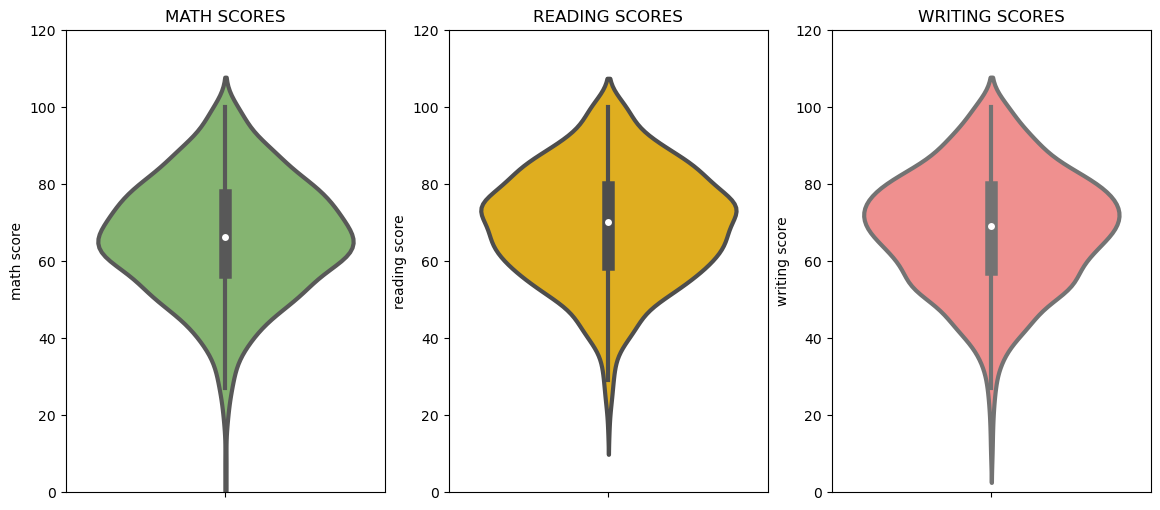

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1) # nrows=2, ncols=2, index=1
plt.title('MATH SCORES')
plot = sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
plot = sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
plot= sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plot.set_ylim(0, 120)
plt.show()

Из графиков видно, что большинство студентов набрали 60-80 по математике и 50-80 по чтению и письму.

**Посмотрим, как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)
и от пола (gender)**

Постройте график (гистограмму, любую нравящуюся вам визуализацию) зависимости оценок по математике (math score) от test preparation course и от gender. То же самое - для оценок за reading и writing.

В данном случае для каждого графика добавляем поле `x` для разделения значений (в нашем случае - `gender`)

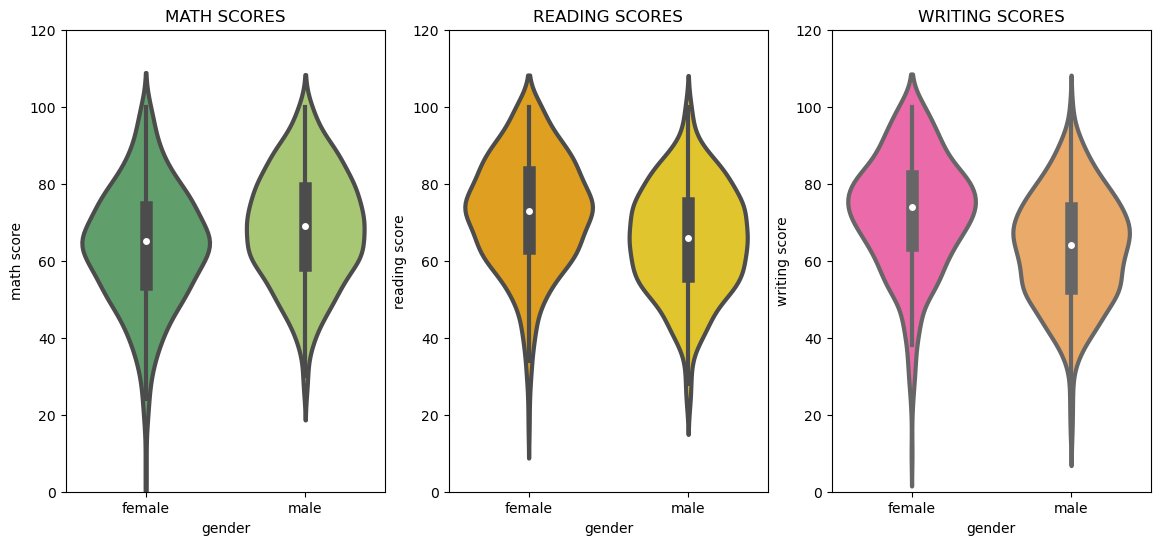

In [25]:
plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1) # nrows=2, ncols=2, index=1
plt.title('MATH SCORES')
plot = sns.violinplot(y='math score',x='gender', data=df,palette='summer',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
plot = sns.violinplot(y='reading score',x='gender', data=df,palette='Wistia_r',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
plot= sns.violinplot(y='writing score',x='gender', data=df,palette='spring',linewidth=3)
plot.set_ylim(0, 120)
plt.show()

Построим график распределения с `test preparation course`

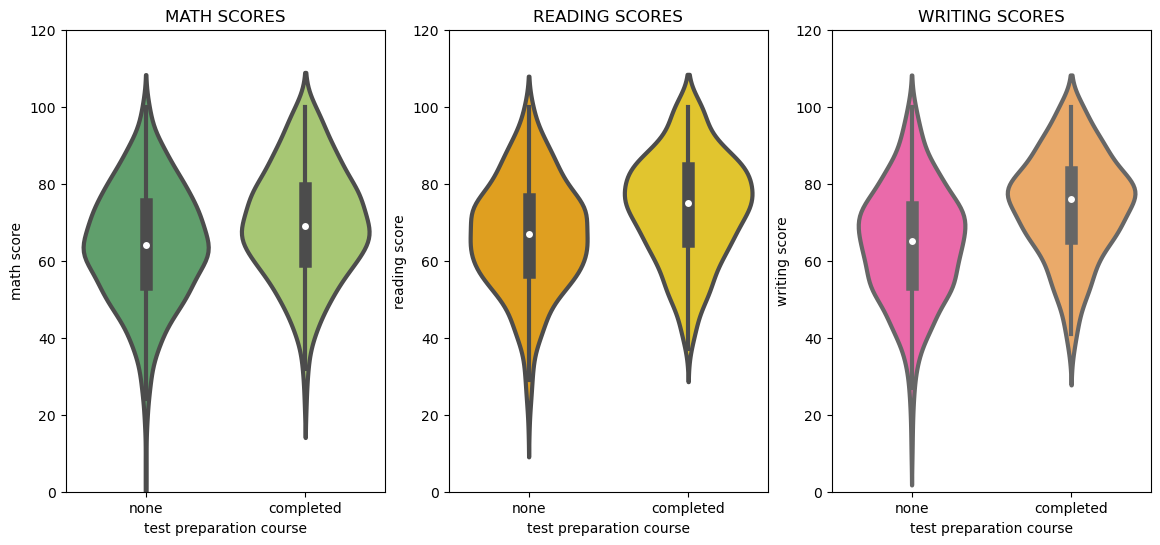

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1) # nrows=2, ncols=2, index=1
plt.title('MATH SCORES')
plot = sns.violinplot(y='math score',x='test preparation course', data=df,palette='summer',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
plot = sns.violinplot(y='reading score',x='test preparation course', data=df,palette='Wistia_r',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
plot= sns.violinplot(y='writing score',x='test preparation course', data=df,palette='spring',linewidth=3)
plot.set_ylim(0, 120)
plt.show()

Если мы хотим добавить ещё одну категорию, то добавляем параметр `hue`, который необходим для дополнительной категоризации

Получаем:
* основная категория - `test preparation course`
* дополнительная категория - gender`

Таким образом, можно смотреть влияние 2 факторов на вещественную переменную


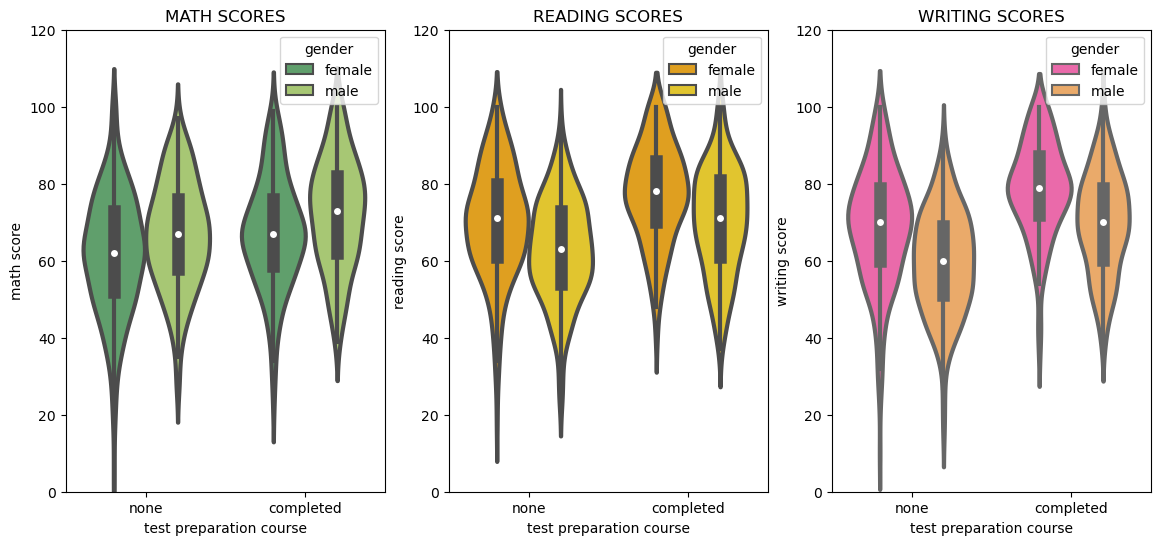

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1) # nrows=2, ncols=2, index=1
plt.title('MATH SCORES')
plot = sns.violinplot(y='math score',x='test preparation course', hue='gender', data=df,palette='summer',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
plot = sns.violinplot(y='reading score',x='test preparation course', hue='gender', data=df,palette='Wistia_r',linewidth=3)
plot.set_ylim(0, 120)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
plot= sns.violinplot(y='writing score',x='test preparation course', hue='gender', data=df,palette='spring',linewidth=3)
plot.set_ylim(0, 120)
plt.show()

Какие выводы можно сделать из этих графиков?

Сделайте выводы и напишите их в этой ячейке.

Двойным кликом можно нажать на этот текст и написать свой вывод:
* что-то стало лучше, если студент проходит курс подготовки
* что-то стало хуже

Если необходимо изучить поведение вещественнозначных переменных по какому-то фактору, то можно использовать `pairplot`:
* если вещественнозначные признаки совпадают (диагональ), то строится распределение графика этой переменной
* если признаки не совпадают, то каждый объект отрисовывается на плоскости точкой (значение признака по каждой из осей)

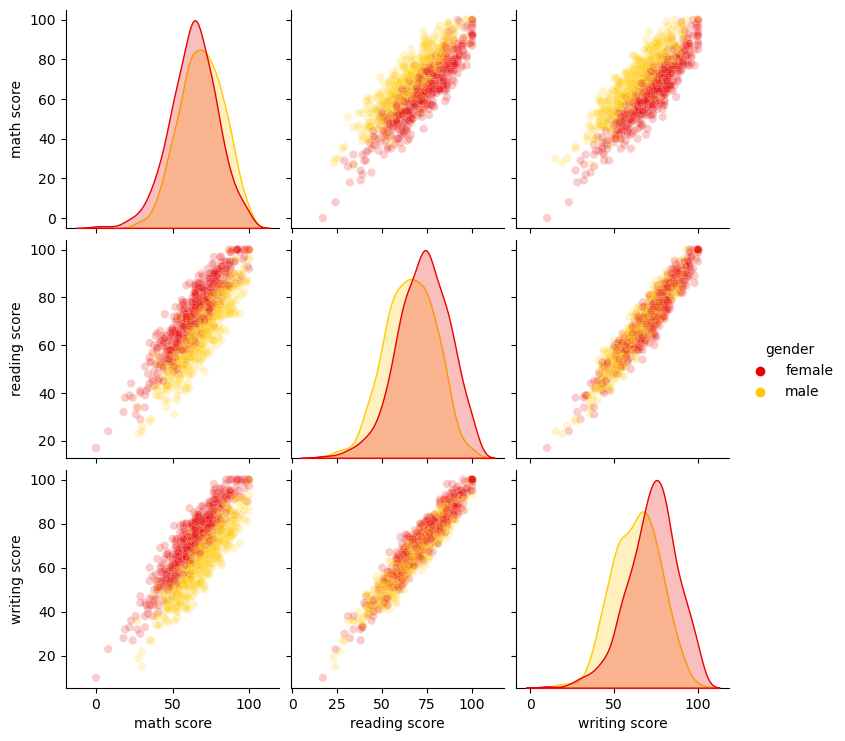

In [28]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

Как влияет lunch на оценки?

Выведем все уникальные значения столбца `lunch`. Для этого можно обратиться к столбцу `lunch` одним из двух способов:
* использовать обращение по полям `df.lunch`
* использовать обращение по элементам массива `df["lunch"]` или `df['lunch']`

После этого у объекта мы используем функцию `unique()`

In [29]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

Постройте barplot, отражающий зависимость оценок по math от test preparation course; сделайте разделение по 'lunch'.
То же самое - для reading и writing.

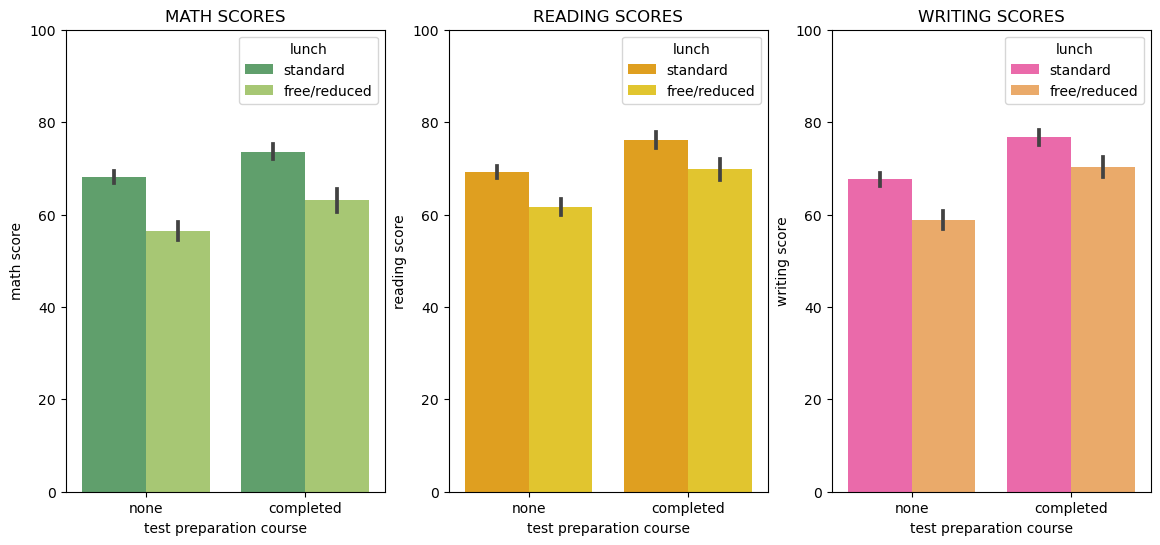

In [51]:
plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1) # nrows=2, ncols=2, index=1
plt.title('MATH SCORES')
plot = sns.barplot(y='math score',x='test preparation course', hue='lunch', data=df,palette='summer',linewidth=3)
plot.set_ylim(0, 100)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
plot = sns.barplot(y='reading score',x='test preparation course', hue='lunch', data=df,palette='Wistia_r',linewidth=3)
plot.set_ylim(0, 100)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
plot= sns.barplot(y='writing score',x='test preparation course', hue='lunch', data=df,palette='spring',linewidth=3)
plot.set_ylim(0, 100)
plt.show()

Такой график позволяет нам отследить средние значения у каждого фактора и стандартное отклонение

Здесь мы поменяем количество столбцов в нашем полотне

Проверяем влияние ланча и тестов подготовки студентов (на занятии была высказана теория, что оценки больше зависят от уровня состояния, а не от наличия хорошего обеда)

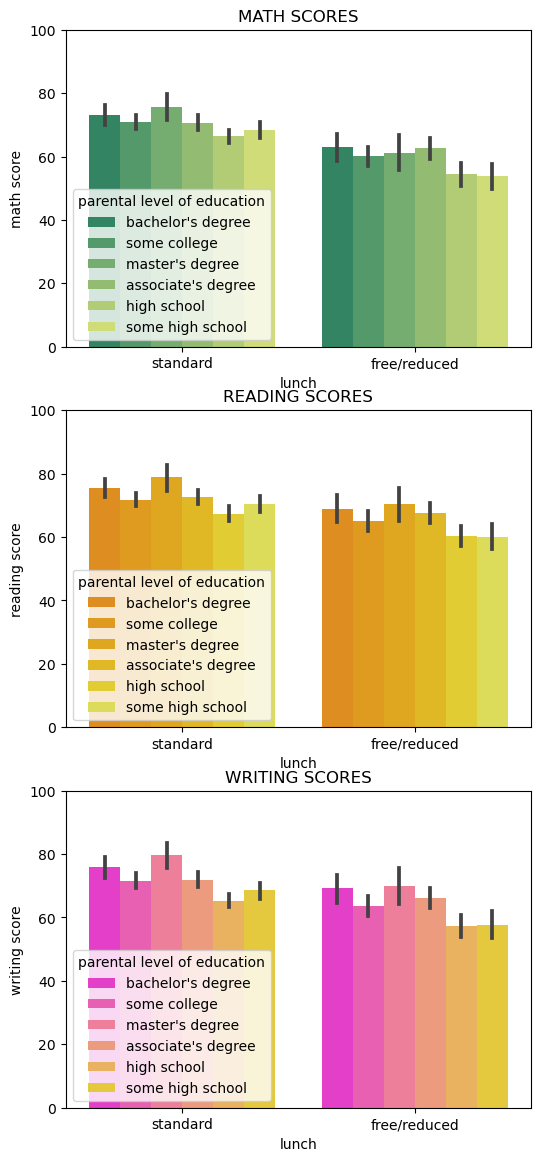

In [55]:
plt.figure(figsize=(6,14))
plt.subplot(3, 1, 1)
plt.title('MATH SCORES')
plot = sns.barplot(y='math score',hue='parental level of education', x='lunch', data=df,palette='summer',linewidth=3)
plot.set_ylim(0, 100)
plt.subplot(3, 1, 2)
plt.title('READING SCORES')
plot = sns.barplot(y='reading score',hue='parental level of education', x='lunch', data=df,palette='Wistia_r',linewidth=3)
plot.set_ylim(0, 100)
plt.subplot(3, 1, 3)
plt.title('WRITING SCORES')
plot= sns.barplot(y='writing score',hue='parental level of education', x='lunch', data=df,palette='spring',linewidth=3)
plot.set_ylim(0, 100)
plt.show()

####  Исследуем оценки по математике (Math)

Постройте гистограмму (plt.hist или sns.countplot) распределения оценок студентов по математике.

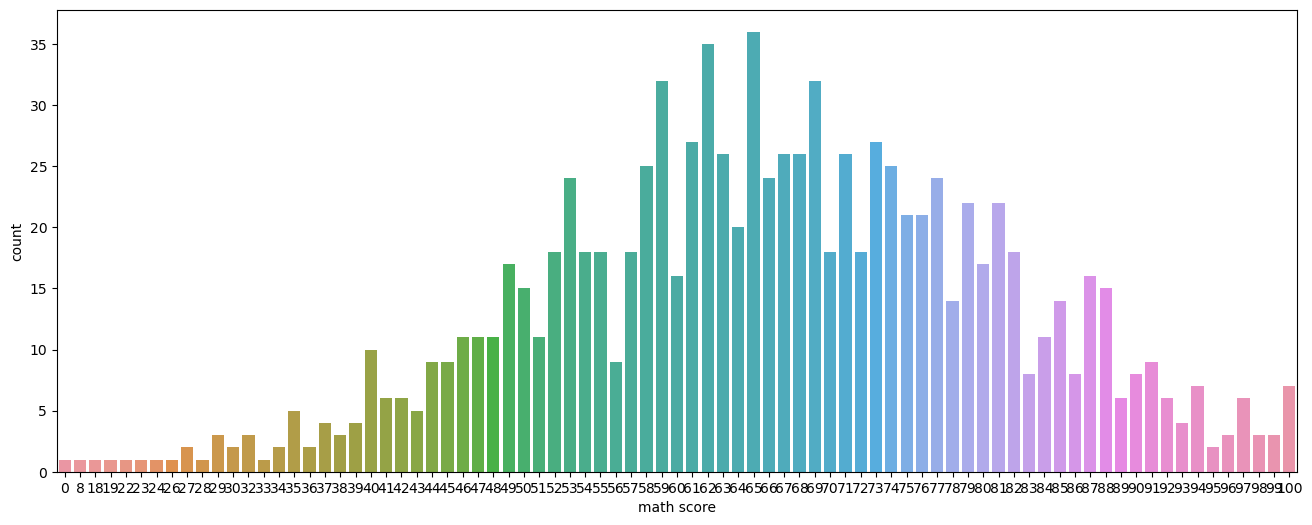

In [38]:
plt.figure(figsize=(16,6))
plot = sns.countplot(data=df, x='math score')
# plot.set_xticks(rotation=90)

Для каждого значения построим их количество. Видно, что график смазан. Поэтому построим распределение по группам (бинам)

(array([  1.,   1.,   0.,   2.,   3.,   7.,   8.,  18.,  36.,  59.,  86.,
        102., 124., 144., 114., 102.,  76.,  59.,  34.,  24.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

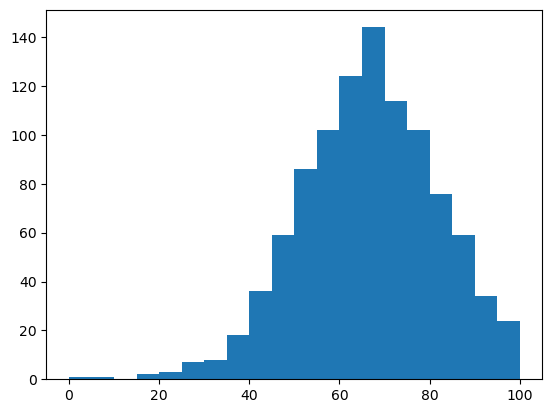

In [40]:
plt.hist(df['math score'], bins=20)

#### Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Напишем функцию, которая преобразует столбец и применим к неё функцию `apply`.

При этом функция будет преобразовывать входное значение и назначать выходной результат

In [57]:
def is_passed(score):
    if score < passmark:
        return 'F'
    else:
        return 'P'

In [58]:
df['Math_PassStatus'] = df['math score'].apply(is_passed)

### Как зависит успех сдачи экзамена от уровня образования?

Постройте гистограмму (countplot) распределения студентов по уровням образования.

По оси y мы строим количество элементов по каждому `parental level of education`

<Axes: xlabel='count', ylabel='parental level of education'>

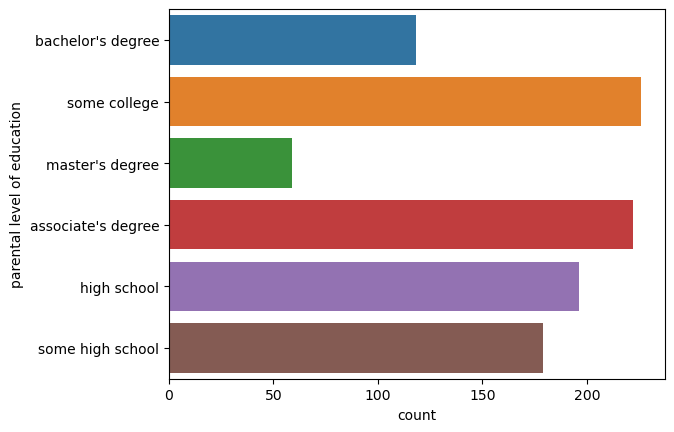

In [60]:
sns.countplot(data=df, y='parental level of education')

Создайте countplot, отображающий зависимость Math_PassStatus от parental level of education

Используем в случае разделения по столбцу `Math_PassStatus`, который мы только что создали

<Axes: xlabel='count', ylabel='parental level of education'>

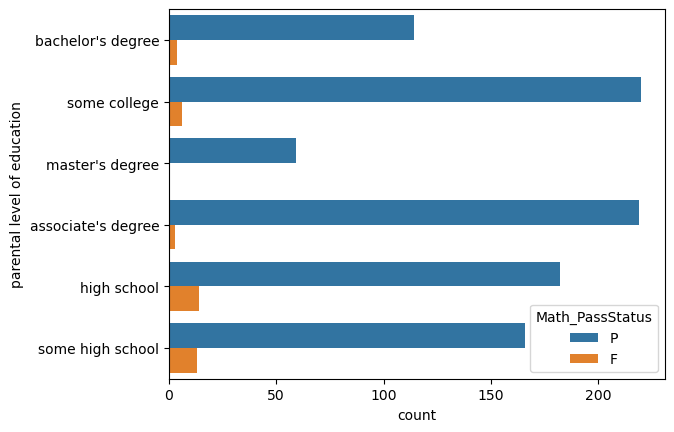

In [62]:
sns.countplot(data=df, y='parental level of education', hue='Math_PassStatus')

Чтобы нарисовать общее значения (stacked barplot), то можно использовать `displot`

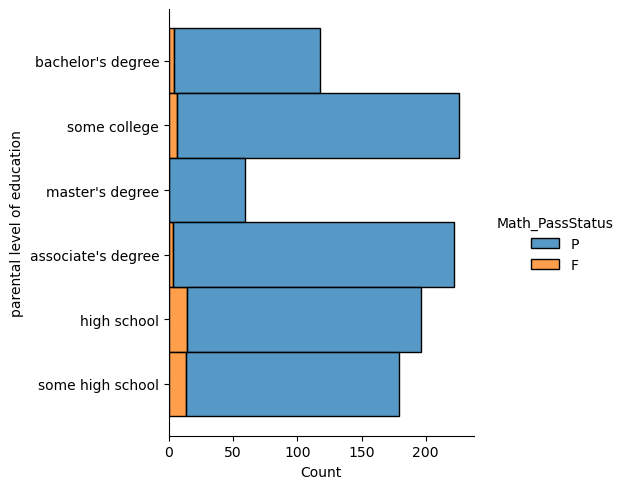

In [63]:


sns.displot(df, y='parental level of education', hue='Math_PassStatus', multiple='stack')

Удобнее всего использовать процентное соотношение по каждому статусу, чтобы сгладить значения

Мы видим, что процент несдавших для high school и some high school максимальный. Для master degree все сдали математику

<Axes: xlabel='Proportion', ylabel='parental level of education'>

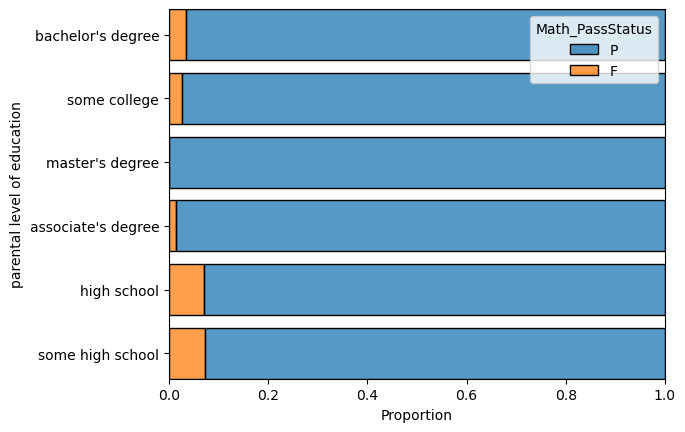

In [45]:
sns.histplot(
    data=df,
    y="parental level of education", hue="Math_PassStatus",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)

#### Исследуем оценки за чтение (Reading)

Повторите предыдущие шаги

In [ ]:
#your code here

#### Исследуем оценки за письмо (Writing)

Повторите предыдущие шаги

In [ ]:
#your code here

#### Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [ ]:
#your code here

Создайте диаграмму, отображающую зависимость OverAll_PassStatus от parental level of education

In [ ]:
#your code here

#### Найдите распределение средней оценки за все экзамены

Создайте столбец Total_Marks и запишите в него суммарный балл каждого студента за все дисциплины.

Создайте столбец Percentage, в который запишите средний балл студента за все дисциплины.

Нарисуйте гистограмму распределения среднего балла.

In [ ]:
#your code here

**Итоговый балл в зависимости от уровня образования**

In [ ]:
fig,ax=plt.subplots()
sns.barplot(x='parental level of education',y='Total_Marks',data=df,palette='Wistia')
fig.autofmt_xdate()

#### Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 80 = A
####      70-80 = B
####      60-70 = C
####      50-60 = D
####      40-50 = E
####    меньше 40 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

In [ ]:
def GetGrade(Percentage, OverAll_PassStatus):
    #your code here

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

#your code here

#### Нарисуем распределение полученных оценок

In [ ]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

Нарисуйте гистограмму распределения оценок в зависимости от уровня образования.

In [ ]:
#your code here

Посмотрим на лучших студентов

In [ ]:
df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['Total_Marks'],ascending=False)

Посмотрим на распределение оценок в зависимости от пола для каждой этнической группы

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')
plt.show()

# Машинное обучение

## Решим задачу предсказания сдачи/несдачи студентом теста по известной информации.

In [ ]:
df.columns

Закодируем с помощью OneHotEncoding категориальные признаки

In [ ]:
base = pd.get_dummies(df,columns=['gender','race/ethnicity','parental level of education','test preparation course',\
                                  'lunch'],dtype = int)
base.sample()
base.info()

## Создадим обучающую матрицу и столбец с целевой переменной.

Создайте матрицу признаков X, состоящую только из закодированных признаков.

Создайте целевой вектор y, в котором для каждого студента стоит 1, его OverAll_PassStatus равен 'P', и 0 иначе.

In [ ]:
#your code here

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.05)

model = LogisticRegression()
model.fit(train_x,train_y)

target = model.predict(test_x)

accuracy_score(target,test_y)

### Посмотрим, не переобучился ли наш алгоритм

Для этого:

1) посмотрим на качество алгоритма на обучающих данных и на тестовых данных

2) запустим обучение и предсказание несколько раз для разных разбиений и посмотрим на стабильность предсказаний (на метрику)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.15)

model = LogisticRegression()
model.fit(train_x,train_y)

target_train = model.predict(train_x)
target_test = model.predict(test_x)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train,train_y),accuracy_score(target_test,test_y)))

### Попробуйте использовать другой классификатор - решающее дерево.

А он переобучается?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#your code here

## Теперь решим задачу регрессии: предскажем суммарный балл каждого студента за тест.

Создайте целевой вектор y2, равный столбцу Percentage

In [ ]:
#your code here

Обучите линейную регрессию для решения данной задаче по аналогии с предыдущим примером классификации.

Сделайте предсказние на тестовой части.

Выведите качество предсказания (средеквадратичную ошибку - MSE).

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#your code here

### Аналогично предыдущей задаче проверьте, не переобучается ли ваш алгоритм

In [ ]:
#your code here